•Regresión múltiple:
–Calcular correlación de variable dependiente con variable independientes (debe estar entre -0.4 y 0.4)
–Seleccionar dos o más variables independientes.
–Estandarizar variables.
–Calcular regresión con función de Python.
–Hacer pronóstico.
–Regresar a unidades originales-

In [103]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

datos = pd.read_csv('/content/SeoulBikeData.csv', delimiter=',')
datos

,RentedBike,Hour,Temperature(C),Humidity(%),Wind(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [104]:
datos.columns

Index(['RentedBike', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind(m/s)',
       'Visibility(10m)', 'Dewpointtemperature(C)', 'SolarRadiation(MJ/m2)',
       'Rainfall(mm)', 'Snowfall(cm)'],
      dtype='object')

Dispersion de las variables

In [105]:
datos.corr()

,RentedBike,Hour,Temperature(C),Humidity(%),Wind(m/s),Visibility(10m),Dewpointtemperature(C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm)
RentedBike,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind(m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility(10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dewpointtemperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
SolarRadiation(MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall(cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


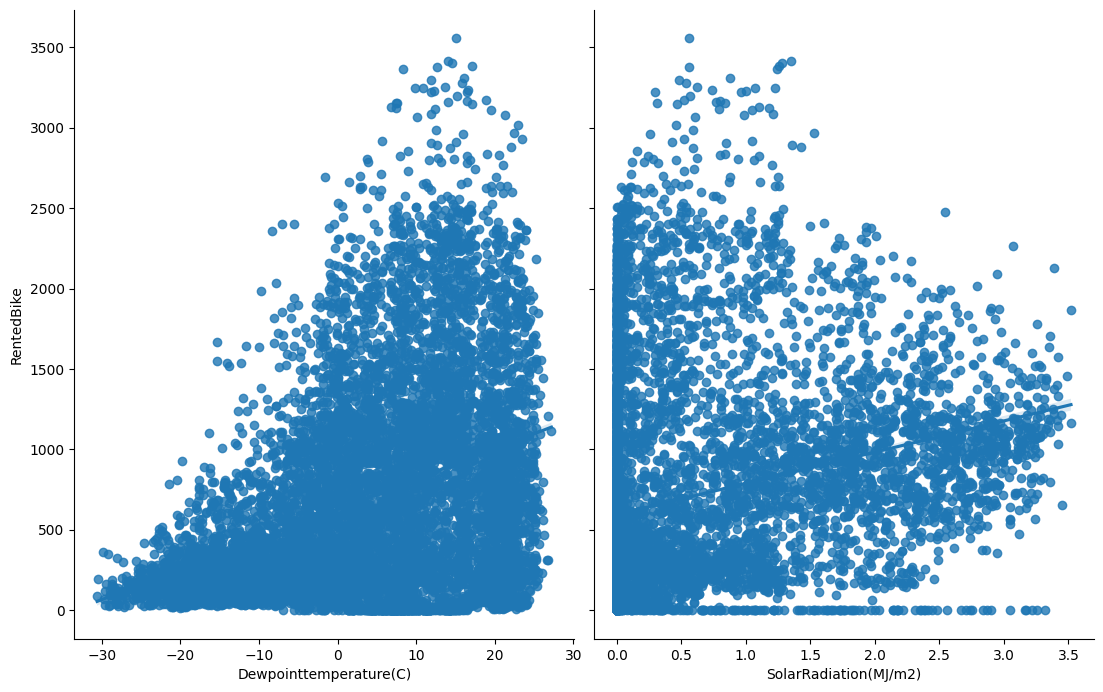

In [106]:
sns.pairplot(datos, x_vars=['Dewpointtemperature(C)','SolarRadiation(MJ/m2)'], y_vars='RentedBike', size=7, aspect=0.8,kind = 'reg')

In [107]:
corr_matrix = datos[['RentedBike','Dewpointtemperature(C)','SolarRadiation(MJ/m2)']].corr(method='pearson')
corr_matrix

,RentedBike,Dewpointtemperature(C),SolarRadiation(MJ/m2)
RentedBike,1.000000,0.379788,0.261837
Dewpointtemperature(C),0.379788,1.000000,0.094381
SolarRadiation(MJ/m2),0.261837,0.094381,1.000000


# Definicion del Modelo de Regresión Multiple

In [108]:
X = datos[['Dewpointtemperature(C)', 'SolarRadiation(MJ/m2)']]  # variables independientes
y = datos['RentedBike']  # variable dependiente


In [109]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
#Estandarizar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
# Convertir las variables estandarizadas a un DataFrame para mantener el contexto
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Entrenar el modelo

In [112]:
#Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_scaled_df, y)

LinearRegression()

In [113]:
X = sm.add_constant(X)  # agregar término constante

# Hacer predicciones
modelo = sm.OLS(y, X).fit()
y_pred = model.predict(X_test)

In [114]:
coefficients = model.coef_
intercept = model.intercept_
print("Coeficientes:", coefficients)
print("Intersección:", intercept)

Coeficientes: [231.06810405 147.06603433]
Intersección: 704.6020547945205


In [115]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9455391.794079967


In [117]:
#Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_scaled_df)

In [118]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             RentedBike   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:46:17   Log-Likelihood:                -68146.
No. Observations:                8760   AIC:                         1.363e+05
Df Residuals:                    8757   BIC:                         1.363e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    536

In [119]:
# Para ver las predicciones en comparación con los valores reales
result_df = pd.DataFrame({
    'Real': y,
    'Predicted': y_pred
})

result_df.head()

,Real,Predicted
0,254,224.772726
1,204,224.772726
2,173,223.003394
3,107,224.772726
4,78,207.079406


In [120]:
# Verificar la homocedasticidad y distribución normal de los residuos
resids = modelo.resid
resids

,0
0,29.227274
1,-20.772726
2,-50.003394
3,-117.772726
4,-129.079406
...,...
8755,649.066038
8756,402.988710
8757,332.988710
8758,349.219378


# Visualizacion de Resultados

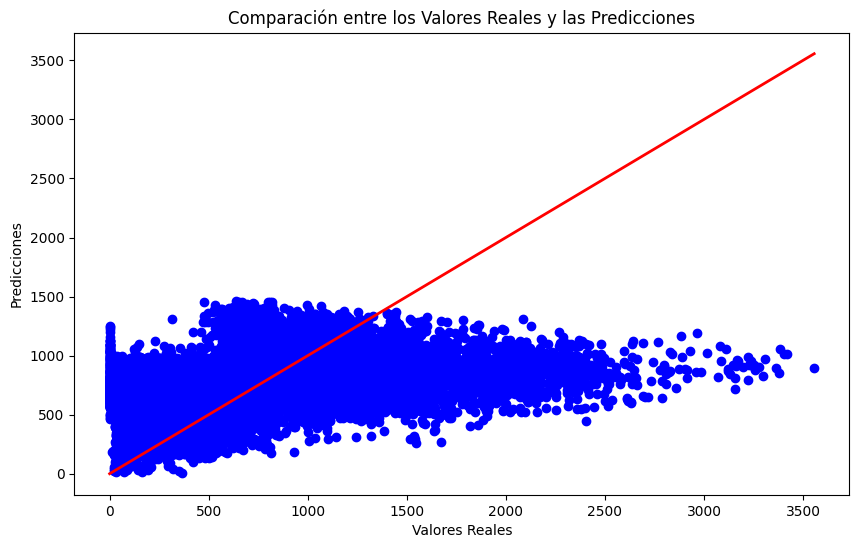

In [121]:
#Visualizacion para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre los Valores Reales y las Predicciones')
plt.show()